## Feature Selection

In [13]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif

In [14]:
data = pd.read_csv("../data/fetal_health.csv")
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Inter-feature Correlation
From the heatmap in the EDA notebook, it can be observed that there are groups of features which are highly correlated with each other. These groups features are:
- histogram_mode
- histogram_mean
- histogram_median

and

- histogram_min
- histogram_width

Removing features with high linear correlation will lead to:
1. Less redundancy
2. Decrease in model complexity and feature space
3. Increase in model understandability
4. Increased training speed

Hypothesis:
- Removing redundant features relating to histogram will lead to less redundancy, decrease in model complexity and feature space, increase in model understandability, and increased training speed

In [15]:
data_modified = data.drop(['histogram_mode', 'histogram_mean', 'histogram_min'], axis=1)
data_modified.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,126.0,2.0,0.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,10.4,130.0,198.0,6.0,1.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,13.4,130.0,198.0,5.0,1.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,23.0,117.0,170.0,11.0,0.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,170.0,9.0,0.0,138.0,11.0,1.0,1.0


In [16]:
data_modified.shape

(2126, 19)

Observation:
- The data now has 18 feature columns +  1 target column. Let's see if we can narrow down this dataset to include even fewer feature columns. 

Questions:
- How can we find more columns which might not be necessary for, or might even impair, prediction?

## Information Gain

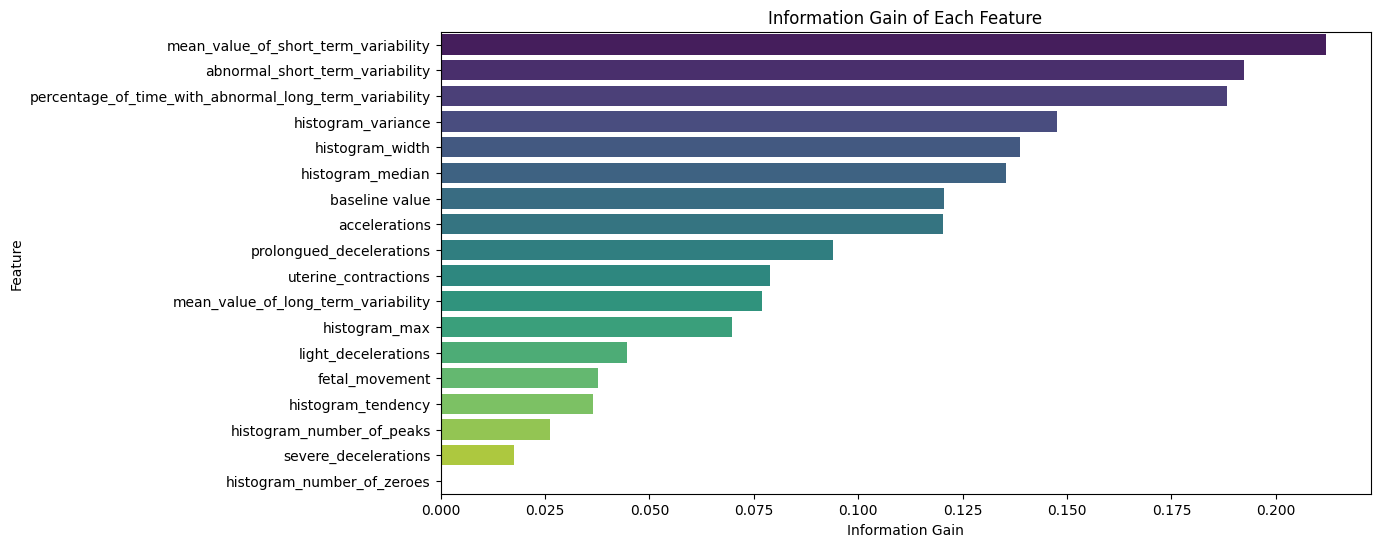

In [17]:
x = data_modified.drop(columns=['fetal_health'])
y = data_modified['fetal_health']

info_gain = mutual_info_classif(x, y)

info_gain_df = pd.DataFrame({
    'Feature': x.columns,
    'Information Gain': info_gain
})
info_gain_df = info_gain_df.sort_values(by='Information Gain', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Information Gain', y='Feature', data=info_gain_df, palette='viridis')

plt.title('Information Gain of Each Feature')
plt.xlabel('Information Gain')
plt.ylabel('Feature')
plt.show()

Observation:
- About half the features are above 0.1 information gain, while the other half quickly falls off and almost reaches 0.

Impact:
- Setting the threshold at 0.1 information gain, we can remove all features less than this threshold and declare these features as poor predictors of  fetal health

In [18]:
high_info_gain = info_gain_df[info_gain_df['Information Gain'] < 0.1]
high_info_gain_cols = high_info_gain['Feature'].tolist()
print(high_info_gain_cols)

['prolongued_decelerations', 'uterine_contractions', 'mean_value_of_long_term_variability', 'histogram_max', 'light_decelerations', 'fetal_movement', 'histogram_tendency', 'histogram_number_of_peaks', 'severe_decelerations', 'histogram_number_of_zeroes']


In [19]:
data_modified = data_modified.drop(high_info_gain_cols, axis=1)
data_modified.head()

,baseline value,accelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_width,histogram_median,histogram_variance,fetal_health
0,120.0,0.000,73.0,0.5,43.0,64.0,121.0,73.0,2.0
1,132.0,0.006,17.0,2.1,0.0,130.0,140.0,12.0,1.0
2,133.0,0.003,16.0,2.1,0.0,130.0,138.0,13.0,1.0
3,134.0,0.003,16.0,2.4,0.0,117.0,137.0,13.0,1.0
4,132.0,0.007,16.0,2.4,0.0,117.0,138.0,11.0,1.0


In [20]:
data_modified.shape

(2126, 9)

## Conclusion:

Now the dataset has 9 features and target column. Columns were declared poor predictors and removed for 2 reasons: 
- They were highly correlated with each other (> 0.9)
- Had information gain < 0.1